In [5]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u

In [6]:
energies_m = [
    (0.15, 0.6), (0.6, 20), (0.15, 0.4), (0.3, 0.8), (0.5, 1.0), (1.0, 20), (0.15, 20)
]
r_95_m = [131.9, 63.0, 162.2, 77.4, 100.5, 54.1, 68.1]
r_m = [38.1, -11.7, 44.1, 39, 20.8, -13, 1.2]
s_m = [-0.99, 1.41, 0.39, -0.22, 0.91, 1.01, -0.85]
ul_m = np.array([4.30e-11, 2.85e-12, 6.34e-11, 1.20e-11, 1.55e-12, 2.08e-11]) * u.Unit("1 / (s cm2)")

In [7]:
energies_s = [
    (0.6, 20), (0.4, 0.8), (0.6, 1.0), (1.0, 20), (0.4, 20)
]
r_95_s = [-27.9, 2.9, -3, 12.8, -16.5]
r_s = [-65.9, -65.4, -73.5, -54.5, -56.2]
s_s = [-0.47, 1.29, 1.28, 1.01, 0.73]
ul_m = np.array([3.28e-12, 1.30e-11, 6.9e-12, 2.35e-12, 6.33e-12]) * u.Unit("1 / (s cm2)")

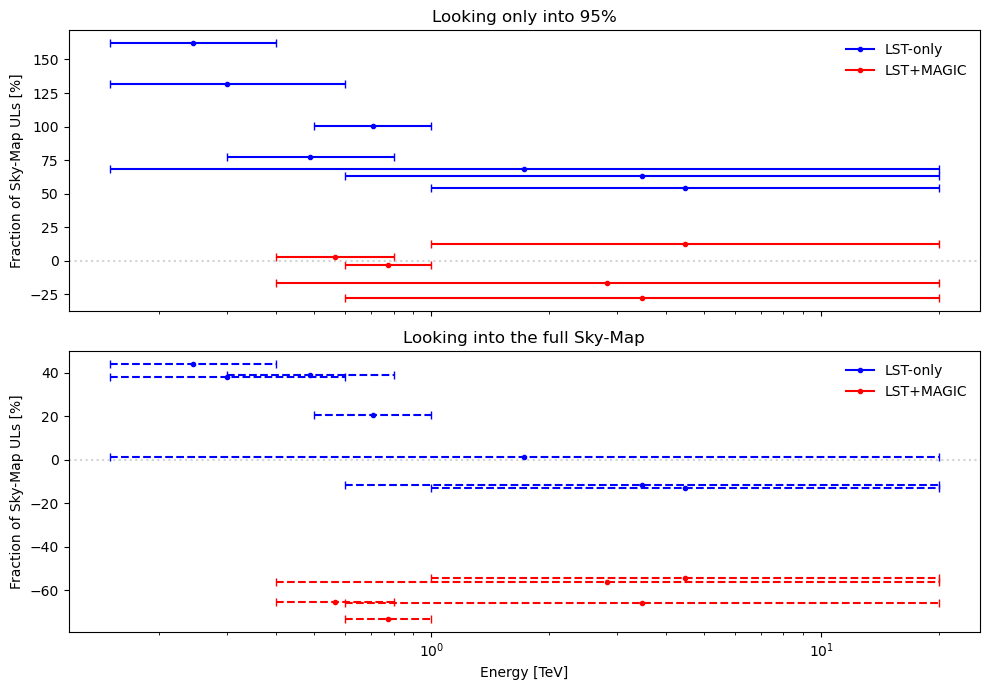

In [21]:
cm, cs = "b","r"

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7), sharex=True)

for i, (em, eM) in enumerate(energies_m[:]):
    eC = np.sqrt(em * eM)
    ax1.errorbar(eC, r_95_m[i], xerr=[[eC-em], [eM-eC]], color=cm, marker=".", capsize=3)
    err = ax2.errorbar(eC, r_m[i], xerr=[[eC-em], [eM-eC]], color=cm, marker=".", capsize=3)
    err[-1][0].set_linestyle("--")

for i, (em, eM) in enumerate(energies_s[:]):
    eC = np.sqrt(em * eM)
    ax1.errorbar(eC, r_95_s[i], xerr=[[eC-em], [eM-eC]], color=cs, marker=".", capsize=3)
    err = ax2.errorbar(eC, r_s[i], xerr=[[eC-em], [eM-eC]], color=cs, marker=".", capsize=3)
    err[-1][0].set_linestyle("--")

for ax in [ax1, ax2]:
    ax.plot([], [], color=cm, ls="-", marker=".", label="LST-only")
    ax.plot([], [], color=cs, ls="-", marker=".", label="LST+MAGIC")
    # ax.plot([], [], color="gray", ls="-", marker="", label="95% region")
    # ax.plot([], [], color="gray", ls="--", marker="", label="Full Sky-Map")

    ax.legend(frameon=False)
    ax.axhline(0, ls=":", color="lightgray")
    ax.set_ylabel("Fraction of Sky-Map ULs [%]")
    
ax2.set_xlabel("Energy [TeV]")
ax2.set_xscale("log")
ax1.set_title("Looking only into 95%"); ax.set_title("Looking into the full Sky-Map")
fig.tight_layout()

plt.show()

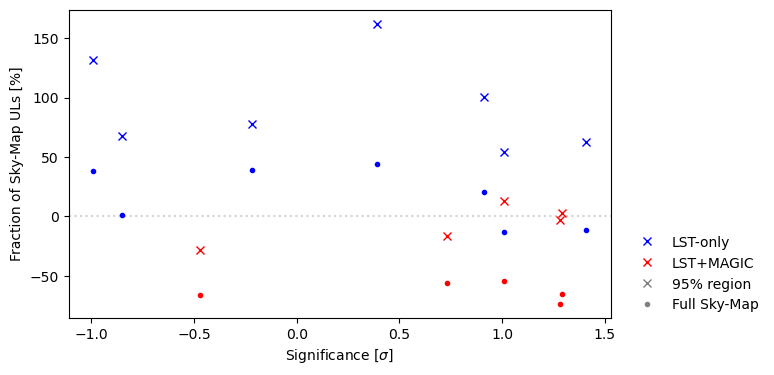

In [14]:
cm, cs = "b","r"

fig, ax = plt.subplots(figsize=(7, 4))

for i, s in enumerate(s_m[:]):
    ax.errorbar(s, r_95_m[i], color=cm, marker="x", capsize=3)
    ax.errorbar(s, r_m[i], color=cm, marker=".", capsize=3)

for i, s in enumerate(s_s[:]):
    ax.errorbar(s, r_95_s[i], color=cs, marker="x")
    ax.errorbar(s, r_s[i], color=cs, marker=".")

ax.plot([], [], color=cm, ls="", marker="x", label="LST-only")
ax.plot([], [], color=cs, ls="", marker="x", label="LST+MAGIC")
ax.plot([], [], color="gray", ls="", marker="x", label="95% region")
ax.plot([], [], color="gray", ls="", marker=".", label="Full Sky-Map")

ax.legend(loc=(1.03, 0), frameon=False)
ax.axhline(0, ls=":", color="lightgray")
ax.set_xlabel("Significance [$\sigma$]"); ax.set_ylabel("Fraction of Sky-Map ULs [%]")
plt.show()

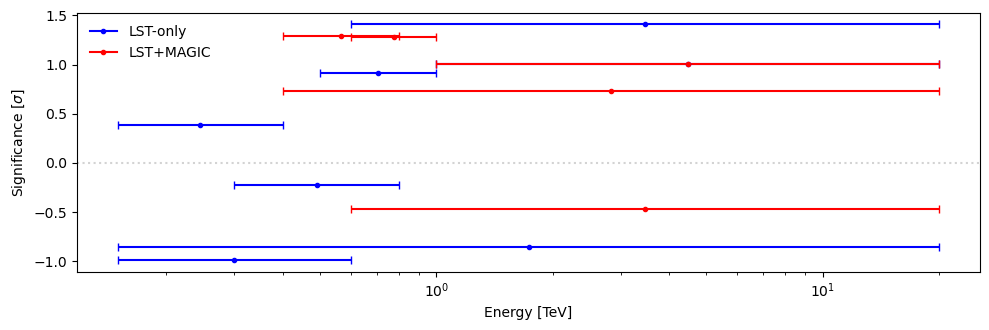

In [26]:
cm, cs = "b","r"

fig, ax1 = plt.subplots(1, 1, figsize=(10, 3.4), sharex=True)

for i, (em, eM) in enumerate(energies_m[:]):
    eC = np.sqrt(em * eM)
    ax1.errorbar(eC, s_m[i], xerr=[[eC-em], [eM-eC]], color=cm, marker=".", capsize=3)
    
for i, (em, eM) in enumerate(energies_s[:]):
    eC = np.sqrt(em * eM)
    ax1.errorbar(eC, s_s[i], xerr=[[eC-em], [eM-eC]], color=cs, marker=".", capsize=3)

ax1.plot([], [], color=cm, ls="-", marker=".", label="LST-only")
ax1.plot([], [], color=cs, ls="-", marker=".", label="LST+MAGIC")

ax1.legend(frameon=False)
ax1.axhline(0, ls=":", color="lightgray")
ax1.set_ylabel("Significance [$\sigma$]")
    
ax1.set_xlabel("Energy [TeV]")
ax1.set_xscale("log")
fig.tight_layout()

plt.show()